In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.datasets import fetch_openml

# Load the Boston Housing dataset from OpenML
boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.data
df['MEDV'] = boston.target  # Add target variable (house prices)

# Display first few rows
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
# Check for missing values
print(df.isnull().sum())

# Summary statistics
df.describe()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


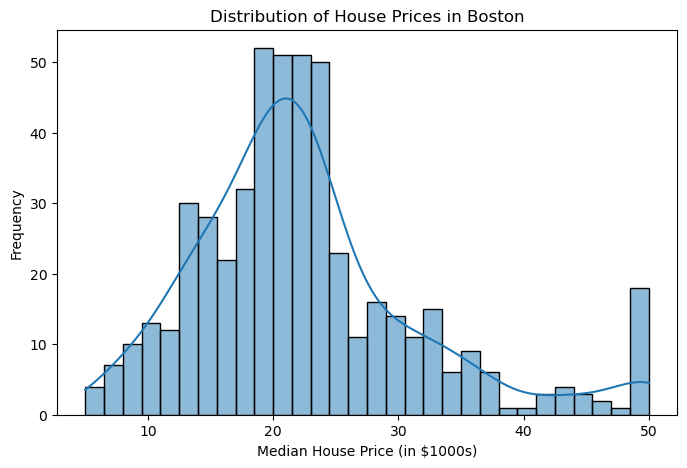

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['MEDV'], bins=30, kde=True)
plt.xlabel("Median House Price (in $1000s)")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices in Boston")
plt.show()


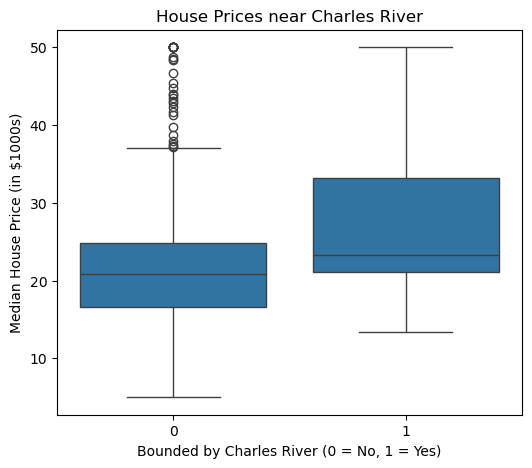

In [7]:
plt.figure(figsize=(6,5))
sns.boxplot(x=df['CHAS'], y=df['MEDV'])
plt.xlabel("Bounded by Charles River (0 = No, 1 = Yes)")
plt.ylabel("Median House Price (in $1000s)")
plt.title("House Prices near Charles River")
plt.show()


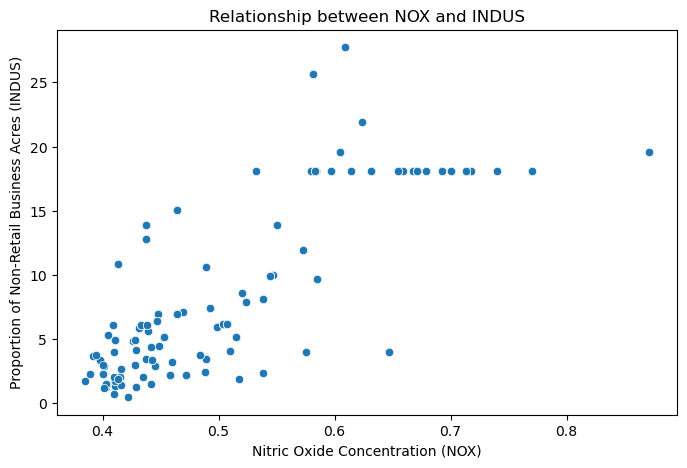

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['NOX'], y=df['INDUS'])
plt.xlabel("Nitric Oxide Concentration (NOX)")
plt.ylabel("Proportion of Non-Retail Business Acres (INDUS)")
plt.title("Relationship between NOX and INDUS")
plt.show()


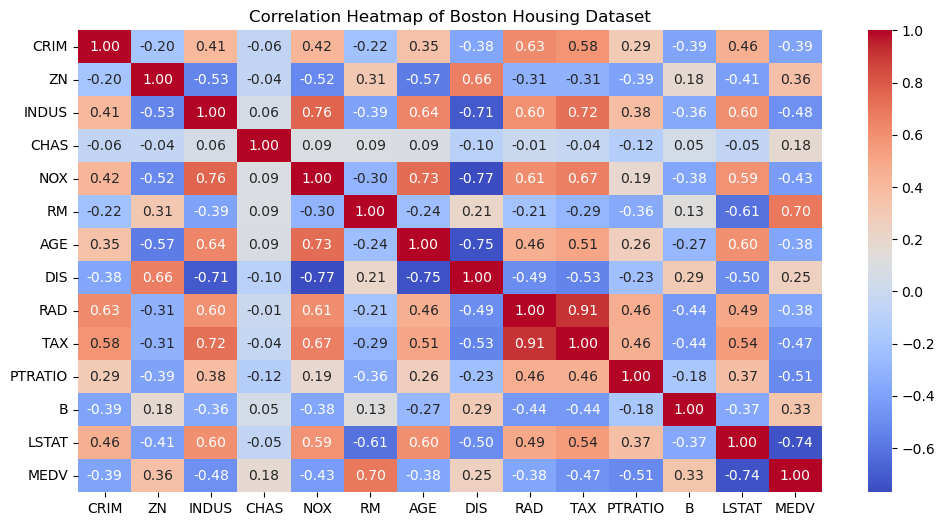

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Boston Housing Dataset")
plt.show()


In [13]:
# Split the data
river_yes = df[df['CHAS'] == 1]['MEDV']
river_no = df[df['CHAS'] == 0]['MEDV']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(river_yes, river_no, nan_policy='omit')

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Conclusion: There is a significant difference in house prices near the river.")
else:
    print("Conclusion: No significant difference in house prices near the river.")


T-statistic: nan
P-value: nan
Conclusion: No significant difference in house prices near the river.


In [15]:
df['AGE_Group'] = pd.cut(df['AGE'], bins=[0, 50, 100], labels=['Newer', 'Older'])

anova_result = stats.f_oneway(
    df[df['AGE_Group'] == 'Newer']['MEDV'].dropna(),
    df[df['AGE_Group'] == 'Older']['MEDV'].dropna()
)

print("F-statistic:", anova_result.statistic)
print("P-value:", anova_result.pvalue)

if anova_result.pvalue < 0.05:
    print("Conclusion: There is a significant difference in median house values based on AGE.")
else:
    print("Conclusion: No significant difference in house prices based on AGE.")


F-statistic: 46.19149068336546
P-value: 3.037923425981101e-11
Conclusion: There is a significant difference in median house values based on AGE.


In [17]:
corr_coeff, p_value = stats.pearsonr(df['NOX'], df['INDUS'])

print("Correlation Coefficient:", corr_coeff)
print("P-value:", p_value)

if p_value < 0.05:
    print("Conclusion: There is a significant relationship between NOX and INDUS.")
else:
    print("Conclusion: No significant relationship between NOX and INDUS.")


Correlation Coefficient: 0.763651446920915
P-value: 7.913361061241167e-98
Conclusion: There is a significant relationship between NOX and INDUS.


In [19]:
X = sm.add_constant(df['DIS'])  # Add constant for intercept
y = df['MEDV']

model = sm.OLS(y, X, missing='drop').fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        12:53:09   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0